In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask.dataframe as dd

%matplotlib inline

C:\Users\ROBERTO\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
regioes = {
    'CO': 'co_subset.csv', 
    'NORDESTE': 'nordeste_subset.csv', 
    'NORTE': 'norte_subset.csv', 
    'SUDESTE': 'sudeste_subset.csv', 
    'SUL': 'sul_subset.csv'
}

for regiao, dataset in regioes.items():
    dados = pd.read_csv(dataset, low_memory=False)
    
    cols = [x for x in range(55,82)]
    cols.append(dados.columns.get_loc('TP_LOCALIZACAO'))
    cols.append(dados.columns.get_loc('TP_SEXO'))
    cols.append(dados.columns.get_loc('TP_TIPO_DOCENTE'))
    filtered = dados.iloc[:, cols]
    filtered['total'] = dados.iloc[:, 55:81].fillna(0).sum(axis=1)
    filtered = filtered[filtered.TP_TIPO_DOCENTE == 1]
    
    print(regiao)
    # médias
    print('Média Geral: ', filtered.total.mean())
    print('Média Masculino Zona Urbada: ', filtered[(filtered.TP_SEXO == 1) & (filtered.TP_LOCALIZACAO == 1)].total.mean())
    print('Média Masculino Zona Rural: ', filtered[(filtered.TP_SEXO == 1) & (filtered.TP_LOCALIZACAO == 2)].total.mean())
    print('Média Feminino Zona Urbada: ', filtered[(filtered.TP_SEXO == 2) & (filtered.TP_LOCALIZACAO == 1)].total.mean())
    print('Média Feminino Zona Rural: ', filtered[(filtered.TP_SEXO == 2) & (filtered.TP_LOCALIZACAO == 2)].total.mean())
    
    # sobrecarga geral
    print('Total de professores: ', filtered.shape[0], ' professores com 2 ou mais disciplinas: ', filtered[filtered.total >= 2].shape[0], ' | ', (filtered[filtered.total >= 2].shape[0] / filtered.shape[0])*100, '%')
    print('Total de professores: ', filtered.shape[0], ' professores com 3 ou mais disciplinas: ', filtered[filtered.total >= 3].shape[0], ' | ', (filtered[filtered.total >= 3].shape[0] / filtered.shape[0])*100, '%')
    
    # sobrecarga por sexo masculino (urbano e rural)
    total_masc_urbano = filtered[(filtered.TP_SEXO == 1) & (filtered.TP_LOCALIZACAO == 1)]
    total_masc_2_mais_u = total_masc_urbano[total_masc_urbano.total >= 2].shape[0]
    total_masc_3_mais_u = total_masc_urbano[total_masc_urbano.total >= 3].shape[0]
    print('Total de professores (Masculino e Urbano): ', total_masc_urbano.shape[0], ' Total com 2 ou mais disciplinas: ', total_masc_2_mais_u, ' | ', (total_masc_2_mais_u / total_masc_urbano.shape[0])*100, '%')
    print('Total de professores (Masculino e Urbano): ', total_masc_urbano.shape[0], ' Total com 3 ou mais disciplinas: ', total_masc_3_mais_u, ' | ', (total_masc_3_mais_u / total_masc_urbano.shape[0])*100, '%')
    total_masc_rural = filtered[(filtered.TP_SEXO == 1) & (filtered.TP_LOCALIZACAO == 2)]
    total_masc_2_mais_r = total_masc_rural[total_masc_rural.total >= 2].shape[0]
    total_masc_3_mais_r = total_masc_rural[total_masc_rural.total >= 3].shape[0]
    print('Total de professores (Masculino e Rural): ', total_masc_rural.shape[0], ' Total com 2 ou mais disciplinas: ', total_masc_2_mais_r, ' | ', (total_masc_2_mais_r / total_masc_rural.shape[0])*100, '%')
    print('Total de professores (Masculino e Rural): ', total_masc_rural.shape[0], ' Total com 3 ou mais disciplinas: ', total_masc_3_mais_r, ' | ', (total_masc_3_mais_r / total_masc_rural.shape[0])*100, '%')
    
    # sobrecarga por sexo feminino (urbano e rural)
    total_fem_urbano = filtered[(filtered.TP_SEXO == 2) & (filtered.TP_LOCALIZACAO == 1)]
    total_fem_2_mais_u = total_fem_urbano[total_fem_urbano.total >= 2].shape[0]
    total_fem_3_mais_u = total_fem_urbano[total_fem_urbano.total >= 3].shape[0]
    print('Total de professores (Feminino e Urbano): ', total_fem_urbano.shape[0], ' Total com 2 ou mais disciplinas: ', total_fem_2_mais_u, ' | ', (total_fem_2_mais_u / total_fem_urbano.shape[0])*100, '%')
    print('Total de professores (Feminino e Urbano): ', total_fem_urbano.shape[0], ' Total com 3 ou mais disciplinas: ', total_fem_3_mais_u, ' | ', (total_fem_3_mais_u / total_fem_urbano.shape[0])*100, '%')
    total_fem_rural = filtered[(filtered.TP_SEXO == 2) & (filtered.TP_LOCALIZACAO == 2)]
    total_fem_2_mais_r = total_fem_rural[total_fem_rural.total >= 2].shape[0]
    total_fem_3_mais_r = total_fem_rural[total_fem_rural.total >= 3].shape[0]
    print('Total de professores (Feminino e Rural): ', total_fem_rural.shape[0], ' Total com 2 ou mais disciplinas: ', total_fem_2_mais_r, ' | ', (total_fem_2_mais_r / total_fem_rural.shape[0])*100, '%')
    print('Total de professores (Feminino e Rural): ', total_fem_rural.shape[0], ' Total com 3 ou mais disciplinas: ', total_fem_3_mais_r, ' | ', (total_fem_3_mais_r / total_fem_rural.shape[0])*100, '%')
    
    print()
    print()

C:\Users\ROBERTO\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CO
Média Geral:  1.117248705951493
Média Masculino Zona Urbada:  1.1210221223234356
Média Masculino Zona Rural:  1.8471420592068517
Média Feminino Zona Urbada:  1.0584109489217317
Média Feminino Zona Rural:  1.5592417061611374
Total de professores:  221205  professores com 2 ou mais disciplinas:  35240  |  15.930923803711488 %
Total de professores:  221205  professores com 3 ou mais disciplinas:  11969  |  5.410818019484189 %
Total de professores (Masculino e Urbano):  76077  Total com 2 ou mais disciplinas:  10696  |  14.059439778119536 %
Total de professores (Masculino e Urbano):  76077  Total com 3 ou mais disciplinas:  3385  |  4.449439383782221 %
Total de professores (Masculino e Rural):  5371  Total com 2 ou mais disciplinas:  2125  |  39.564326940979335 %
Total de professores (Masculino e Rural):  5371  Total com 3 ou mais disciplinas:  1143  |  21.280953267547943 %
Total de professores (Feminino e Urbano):  131739  Total com 2 ou mais disciplinas:  19615  |  14.88928866926271 %

[ 221205  682799  278122 1092984  423863]


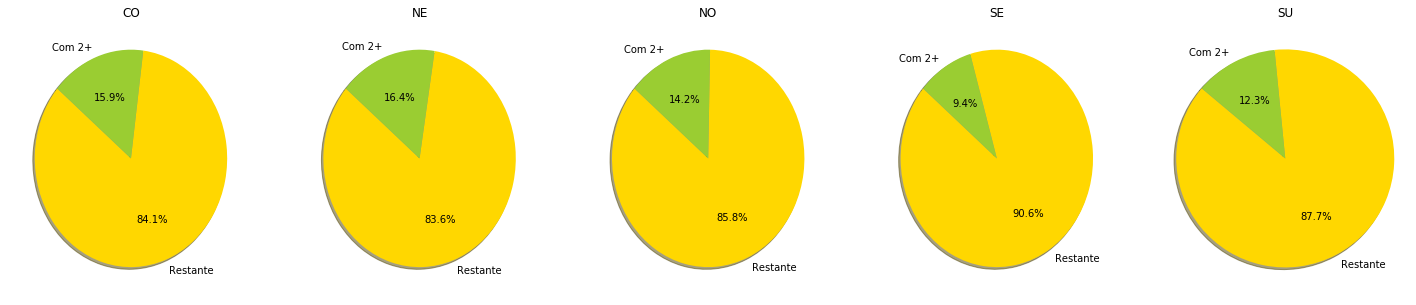

In [48]:
data2 = np.array([
    [221205, 35240, 11969],
    [682799, 111874, 37992],
    [278122, 39487, 11006],
    [1092984, 103032, 16070],
    [423863, 52219, 11652]
])
# Data to plot
labels = 'Restante', 'Com 2+'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice
print(data2[:, 0])
# Plot
size = [data2[0, 0]-data2[0, 1], data2[0, 1]]
fig = plt.figure(figsize=(25, 5))

plt.subplot('151')
plt.title('CO')
plt.pie([data2[0, 0]-data2[0, 1], data2[0, 1]], explode=None, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.subplot('152')
plt.title('NE')
plt.pie([data2[1, 0]-data2[1, 1], data2[1, 1]], explode=None, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.subplot('153')
plt.title('NO')
plt.pie([data2[2, 0]-data2[2, 1], data2[2, 1]], explode=None, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.subplot('154')
plt.title('SE')
plt.pie([data2[3, 0]-data2[3, 1], data2[3, 1]], explode=None, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.subplot('155')
plt.title('SU')
plt.pie([data2[4, 0]-data2[4, 1], data2[4, 1]], explode=None, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.savefig('total_2_mais.png')
plt.show()

[ 221205  682799  278122 1092984  423863]


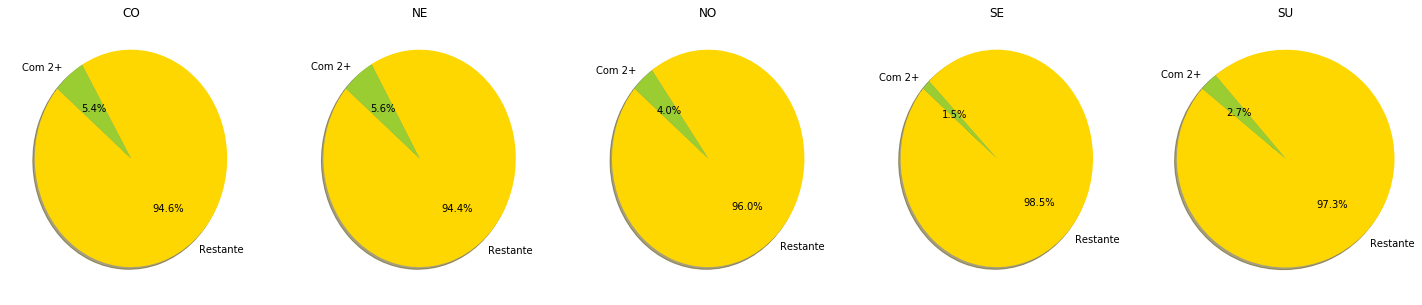

In [49]:
data2 = np.array([
    [221205, 35240, 11969],
    [682799, 111874, 37992],
    [278122, 39487, 11006],
    [1092984, 103032, 16070],
    [423863, 52219, 11652]
])
# Data to plot
labels = 'Restante', 'Com 2+'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice
print(data2[:, 0])
# Plot
size = [data2[0, 0]-data2[0, 1], data2[0, 1]]
fig = plt.figure(figsize=(25, 5))

plt.subplot('151')
plt.title('CO')
plt.pie([data2[0, 0]-data2[0, 2], data2[0, 2]], explode=None, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.subplot('152')
plt.title('NE')
plt.pie([data2[1, 0]-data2[1, 2], data2[1, 2]], explode=None, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.subplot('153')
plt.title('NO')
plt.pie([data2[2, 0]-data2[2, 2], data2[2, 2]], explode=None, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.subplot('154')
plt.title('SE')
plt.pie([data2[3, 0]-data2[3, 2], data2[3, 2]], explode=None, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.subplot('155')
plt.title('SU')
plt.pie([data2[4, 0]-data2[4, 2], data2[4, 2]], explode=None, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.savefig('total_3_mais.png')
plt.show()

[12821 44523 19933 44434 18373]


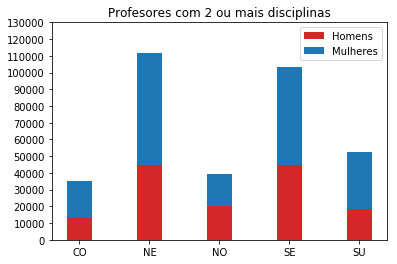

In [16]:
# data = np.array([
#     [10696 + 2125, 19615 + 2804],
#     [3385 + 1143, 6070 + 1371]
# ])
data2 = np.array([
    [10696 + 2125, 19615 + 2804],
    [39332 + 5191, 59752 + 7599],
    [13668 + 6265, 16468 + 3086],
    [42915 + 1519, 56288 + 2310],
    [17081 + 1292, 31417 + 2429]
])
data3 = np.array([
    [3385 + 1143, 6070 + 1371],
    [13188 + 1848, 19984 + 2972],
    [3629 + 1522, 4411 + 1444],
    [7070 + 439, 7865 + 696],
    [3923 + 355, 6737 + 637]
])
print(data2[:, 0])
ind = np.arange(5)
p1 = plt.bar(ind, data2[:, 0], 0.35, color='#d62728')
p2 = plt.bar(ind, data2[:, 1], 0.35, bottom=data2[:, 0])

# plt.ylabel('Scores')
plt.title('Profesores com 2 ou mais disciplinas')
plt.xticks(ind, ('CO', 'NE', 'NO', 'SE', 'SU'))
plt.yticks(np.arange(0, data2.max() *2 , 10000))
plt.legend((p1[0], p2[0]), ('Homens', 'Mulheres'))

plt.savefig('prof_2_mais.png')
plt.show()

[ 221205  682799  278122 1092984  423863]


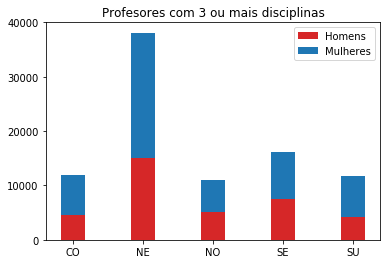

In [15]:
data3 = np.array([
    [3385 + 1143, 6070 + 1371],
    [13188 + 1848, 19984 + 2972],
    [3629 + 1522, 4411 + 1444],
    [7070 + 439, 7865 + 696],
    [3923 + 355, 6737 + 637]
])
print(data2[:, 0])
ind = np.arange(5)
p1 = plt.bar(ind, data3[:, 0], 0.35, color='#d62728')
p2 = plt.bar(ind, data3[:, 1], 0.35, bottom=data3[:, 0])

# plt.ylabel('Scores')
plt.title('Profesores com 3 ou mais disciplinas')
plt.xticks(ind, ('CO', 'NE', 'NO', 'SE', 'SU'))
plt.yticks(np.arange(0, data3.max() *2 , 10000))
plt.legend((p1[0], p2[0]), ('Homens', 'Mulheres'))

plt.savefig('prof_3_mais.png')
plt.show()